# Model Evaluation
## Data Science Tools I
### Don Dalton | University of Denver


---

This notebook covers cross-validation and binary classification evaluation metrics.


Main reference: [*Introduction to Machine Learning with Python: A Guide for Data Scientists* by Andres C. Müller and Sarah 
Guido](https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists-ebook/dp/B01M0LNE8C)

Link to book for free on O'Reilly: https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install mglearn

In [2]:
import mglearn # Custom library made by textbook authors

# Machine Learning Outline

When creating a machine learning model, there are typically a series of steps that you will always follow:

1. Data Preparation
2. Model Selection 
3. **Model Training**
4. **Model Evaluation**
5. Parameter Tuning
6. Predictions

We have covered data preparation in relative depth already, regarding data cleaning, wrangling, aggregation, etc. Model selection and parameter tuning require more background knowledge of how each model works, which is a major aspect of Data Science Tools II. We have seen model training and evaluation utilized, but this lecture will go more in depth on both topics. And of course, predictions are ultimately what every machine learning algorithm is designed to do.



# Generalization and Overfitting

To evaluate our model, we have to make do with the data that we have. Splitting the data into a training set and testing set allows us to let the model learn its parameters (call `fit` in `sklearn`) and then test the results on data that we have "confirmed" or "seen". If the data in the testing set is similar to that of the training set, the model will do well. If not, our results will be poor.

Another situation where we can get poor results even if the two sets contain similar data is when the model becomes too complex. This is an idea known as **overfitting**. The model becomes extremely good at predicting data in the training data, but does not **generalize** to data that it has not yet seen.

Take this made-up dataset on customers who have or have not bought a boat, where predicting as such is the objective. 

In [3]:
pd.DataFrame({
    "age": [66, 52, 22, 25, 44, 39, 26, 40, 53, 64, 58, 33],
    "num_cars_owned": [1, 2, 0, 1, 0, 1, 1, 3, 2, 2, 2, 1],
    "owns_house": ['yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no'],
    "num_children": [2, 3, 0, 1, 2, 2, 2, 1, 2, 3, 2, 1],
    "marital_status": ['widowed', 'married', 'married', 'single', 'divorced', 'married', 'single', 'married', 'divorced', 'divorced', 'married', 'single'],
    "owns_a_dog": ['no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no'],
    "bought_a_boat": ['yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no']
})

,age,num_cars_owned,owns_house,num_children,marital_status,owns_a_dog,bought_a_boat
0,66,1,yes,2,widowed,no,yes
1,52,2,yes,3,married,no,yes
2,22,0,no,0,married,yes,no
3,25,1,no,1,single,no,no
4,44,0,no,2,divorced,yes,no
5,39,1,yes,2,married,yes,no
6,26,1,no,2,single,no,no
7,40,3,yes,1,married,yes,no
8,53,2,yes,2,divorced,no,yes
9,64,2,yes,3,divorced,no,no


Just based on this dataset, we could come up with a rule such as:

> If a customer is over 45 years old AND has less than 3 children OR is not divorced, then they will buy a boat.

This is technically a model of the data, though far more rudimentary than what we have been discussing. Nonetheless, we could boast that this rule is 100% accurate on the given data, which is indeed true. By that reasoning, however, we could also say that if the customer is 66, 52, 53, or 58, they will buy a boat. While this works perfectly fine for data that our extremely simple model has seen, this clearly does not generalize to new, unseen data. This model is too fine-tuned to the specific data in this set, meaning it is **overfitted**.

Naturally, a model that is too simple is called **underfitted**. For example, a rule like "a customer over 40 year old will buy a boat" may generalize to some extent to new data, but does not achieve good accuracy even on the training set.

There is generally a sweet spot at some level of training that achieves good performance on the test set while having good accuracy on the training set. The plot (not on actual data) conveys the usual trend.

![](https://drive.google.com/uc?id=1pXsgGMlXs9cOXZ9ZzfzqcxI3PaVfEBLq)

## Model Complexity vs Dataset Size

The complexity of a model can increase with an increase in dataset size and variety without overfitting. For example, the first rule we had about a customer being over 45, having less than 3 children, or not being divorced is not a good rule when our dataset has just 12 samples. If instead we had 1000 samples, this rule could potentially be a reasonable model if accuracy on the training set is maintained.

Needless to say, more data is always better. The larger the sample size, the closer an approximation we can make of the underlying population and therefore the better our models' predictions will be.

# Cross-Validation

While the basic setup of partitioning the data into train and test, fitting the model to the training set, and evaluating on the testing set is a solid first step, we can do better. In particular, we should consider the possibility that the data within each set are imbalanced. If we are making classifications on the Iris dataset, for example, we could find that the training set contains only data points with 2 of the 3 species, and the testing set contains only the third one. Since our model only "learns" 2 species and not the one it is tested on, its score will be 0.

Of course, `train_test_split` attempts to avoid this by randomizing the data before splitting. Still, there is a small chance that a situation like this could happen. A more robust way of evaluation a model is to use something called **cross-validation**.

Basic cross-validation splits the data into $k$ partitions. $k$ iterations are then performed of leaving out 1 partition as the testing set, training the model on the other $k-1$ partitions, then evaluating.

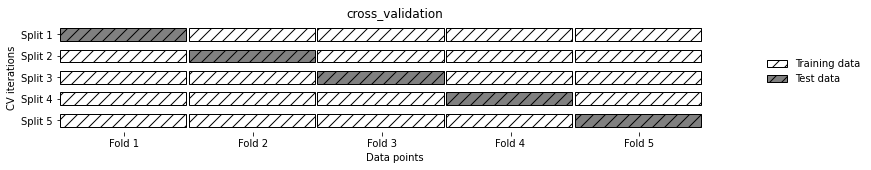

In [4]:
# Certain diagrams are conveniently provided by authors in mglearn
mglearn.plots.plot_cross_validation()

This is known as **k-fold cross-validation**. Commonly $k=5$ (`sklearn`'s default) or $k=10$ are used. The result of a k-fold cross-validation is a list of $k$ scores. Typically these scores are summarized by taking the mean.

In [3]:
from sklearn.model_selection import cross_val_score 
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
import numpy as np
iris = load_iris()
nb = GaussianNB()
scores = cross_val_score(nb, iris.data, iris.target, cv=5) # 5 is the default for cv
print(f"Cross-validation scores: {scores}")
print(f"Cross-validation mean: {np.mean(scores):.3f}")

Cross-validation scores: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Cross-validation mean: 0.953


## Benefits of Cross-Validation

The scores above range from about 93% to 100%. The fact that 100% is possible but not guaranteed is a good example of why using multiple folds gives you a better idea of the performance of your model. While a single run could predict 100% of labels correctly for some test set, just that one run is not enough to demonstrate that level of performance across all unseen data.

Hence, evaluating the model on multiple partitions helps us avoid our chances of just luckily partitioning the data in a way that yields high accuracy. In fact, cross-validation ensures that **every sample in the dataset will be seen exactly once**. 

Moreover, we make even more use of our data. With a single `train_test_split`, by default we use 75% of the data for training and 25% for testing. An iteration of 5-fold CV uses 80% of data for training and similarly for 10-fold CV using 90%. Since we iterate across all folds, all data is at some point used for training so the model becomes more accurate.

## Disadvantage of Standard k-Fold Cross-Validation

As mentioned before, we could have a severe imbalance in the types of samples placed into each fold. Consider the Iris dataset's sequence of labels.

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


If we happened to not shuffle the data before partitioning and took the first two-thirds as training and the last one-third as test, the model would never see the label `2` and completely fail in predicting the test set.

k-fold cross-validation could still yield poor performance on a dataset like this for the same reason. More specifically, if we use a 3-fold cross-validation without shuffling, our scores will all be 0. To enforce this, we import the `KFold` class to give to the `cv` parameter instead of just specifying a number.

In [7]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)
scores = cross_val_score(nb, iris.data, iris.target, cv=kfold)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0. 0. 0.]


A somewhat extreme way of still using k-fold cross-validation while avoiding this pitfall is to use **leave-one-out** cross-validation. That is, $n$, the size of our data, is given as the value of $k$. For 150 samples, 149 are used for training and the remaining 1 is used for testing.

In [8]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(nb, iris.data, iris.target, cv=loo) 
print(f"Number of cv iterations: {len(scores)}")
print(f"Mean accuracy: {scores.mean():.2f}")

Number of cv iterations: 150
Mean accuracy: 0.95


## Stratified k-Fold Cross-Validation

A more robust method for preventing an imbalance of data types in each set is **stratified k-fold cross-validation**. With this method, the overall percentage of each label is assessed across the entire dataset. In the case of the Iris dataset, each of the three labels takes up 33.3% of the dataset. Stratified k-fold cross-validation would therefore ensure that each fold contains the same proportion of 33.3-33.3-33.3 for the three labels within the fold. In doing so, every training set will contain some amount of every label so no label goes unseen.

This is actually what `cross_val_score` executes by default. The type of cross-validation is set differently when `cv` is given some other method like `KFold` or `LeaveOneOut`.

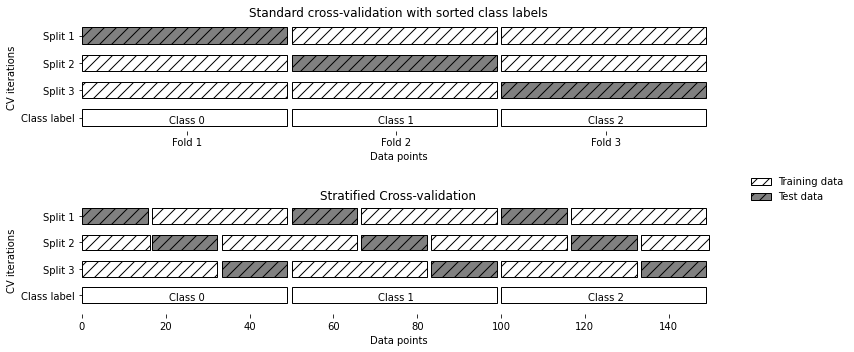

In [9]:
mglearn.plots.plot_stratified_cross_validation()

This concept of stratifying k-fold cross-validation only applies to a classification task since the prediction in that scenario is a label. For regression, a continuous value is given as output, so proportionality of labels does not come into play as part of evaluating the model. **Scikit-Learn uses standard k-fold cross-validation for regression models as a result.**

## Shuffle-Split Cross-Validation

Another robust approach is **shuffle-split cross-validation**. This essentially takes the original setup of `train_test_split` where the data is shuffled before splitting into train and test and applies it multiple times. The diagram below illustrates 10 data points (not a realistic size for a data set) being randomly selected over 4 iterations such that the train set is size 5 and test set is size 2.

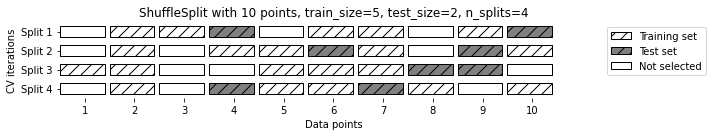

In [10]:
mglearn.plots.plot_shuffle_split()

Shuffle-Split CV gives you a little more control since you can specify both the number of iterations and can provide independent sizes for train and test. The example below uses 90% of the data each iteration, with 50% going to train and 40% going to test.

In [11]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(train_size=.5, test_size=.4, n_splits=10)
scores = cross_val_score(nb, iris.data, iris.target, cv=shuffle_split)
print(f"Cross-validation scores: {scores}")
print(f"Cross-validation mean: {scores.mean():.3f}")

Cross-validation scores: [0.95       0.98333333 0.95       0.98333333 0.95       0.96666667
 0.96666667 0.9        0.95       0.91666667]
Cross-validation mean: 0.952


Unsurprisingly, `StratifiedShuffleSplit` is also available.

## Group k-Fold Cross-Validation

There are many scenarios where data points are not each from independent origins. For example, we could be trying to classify emotions on people's faces with features based on if a smile is detected, if their eyebrows are raised, etc. It is useful in this scenario to have the same person make multiple facial expressions and have each image as a sample. As a result of any of the types of cross-validation we have seen, however, the same person could end up being in both the training and testing sets (since stratification is based on emotion labels, not the person in the picture) despite our hopes of the testing set containing only people the model has not seen. 

Another example is medicine, where multiple observations are made about the same patient over time and we want our model to make predictions on other patients. Speech recognition applications could have multiple recordings from the same person. 

To simulate this idea, we generate a synthetic dataset with 12 data points, each of which we will assume to be in some group with label `0`, `1`, `2`, and `3`. The fact that we're using `make_blobs` has no relevance to the idea of group k-folds, only that it makes a random dataset.

In [13]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(nb, X, y, groups = groups, cv=GroupKFold(n_splits=3))
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.5        0.4        0.66666667]


With the groups specified as a parameter for `cross_val_score` and a corresponding `GroupKFold` method with 3 splits provided, each group is forced to be either entirely in the training set or entirely in the testing set for each split. This is visualized below.

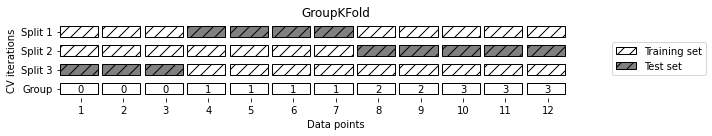

In [14]:
mglearn.plots.plot_group_kfold()

# Evaluation Metrics

Thus far, we have been using accuracy as the main metric for classification and $R^2$ as the metric for regression. These, however, are not the only means of evaluating a model and in particular, classification problems are not always best assessed on accuracy alone. Although accuracy is intuitive and easy to explain, ultimately the best metric depends on the problem.


## Binary Classification

A common and simple example of this is binary classification, where each data point is classified as one of two possible labels. When we discussed hypothesis testing, we defined type I and type II errors, which are basically different names for **false positives** and **false negatives**. These apply to binary classification as well and the consequences of each can be anywhere from trivial to enormous depending on the task.

For example, suppose we are programming a "smart" fire alarm that uses machine learning to detect fires. A false positive would be the case where the alarm goes off but there is no fire. This is an inconvenience and perhaps an annoyance to the owner, but ultimately it is of little consequence so long as it doesn't happen too often and the owner asks for a refund. A false negative, on the other hand, would be when the alarm does not go off but there is a fire. This has drastic, possibly deadly consequences and must be avoided at all costs.

### Imbalanced Datasets

To illustrate why these types of errors are distinct from accuracy, consider the case where the data is significantly imbalanced: 90% of the data has one label, and 10% the other. If our model simply chooses the majority label for every prediction, we achieve 90% accuracy. This is an impressive result to the layperson or someone who does not investigate further, but clearly we are not actually "learning" anything here. We need some other means of distinguishing between a "dummy" model and an actual, potentially good model.

Here we use the EMNIST handwritten digits dataset with a twist to illustrate this point. This dataset is commonly used a "hello world" program for basic machine learning, particularly deep learning, demos. Each data point is a black-and-white image of a digit with a corresponding label that is the true digit that was written (0 through 9). The nature of the data is not so important for this example since we're going to change it anyway.

Instead of 10 different labels, we make 2 using boolean values indicating if a digit is `nine` or is `not_nine`.

In [15]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9 # Labels are now True and False, corresponding to the original label being 9 or not

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

`sklearn` provides a `DummyClassifier` that can be set to predict labels based on a trivial option. Here we set it to choose the majority label every time.

In [16]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print(f"Unique predicted labels: {np.unique(pred_most_frequent)}")
print(f"Test score: {dummy_majority.score(X_test, y_test):.2f}")

Unique predicted labels: [False]
Test score: 0.90


Since 90% of labels are False because 9 out of the 10 digits are not the digit 9, the dummy classifier only predicts False but still achieves 90% accuracy.

Let's try another classifier and see the results.

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(f"Test score: {logreg.score(X_test, y_test):.2f}")

Test score: 0.98


C:\Users\donda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Note how the sklearn gave a convergence warning.  They suggest to scale the data (mean zero, standard deviation one).  The end result is slightly different because the logistic regression actually converged.

In [20]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_test)
X_testscaled = scaler.transform(X_test)
logreg = LogisticRegression(C=0.1).fit(X_scaled, y_train)
pred_logreg = logreg.predict(X_testscaled)
print(f"Test score: {logreg.score(X_testscaled, y_test):.2f}")

Test score: 0.97


### Confusion Matrices

A more definitive means of evaluating a binary classification model is to use a confusion matrix. With only two labels available, one is considered the "positive" label and the other the "negative" label. In our simple example, `nine` is positive and `not_nine` is negative. A confusion matrix outlines the total number of true positives, false positives, true negatives, and false negatives made by a given model based on this categorization.

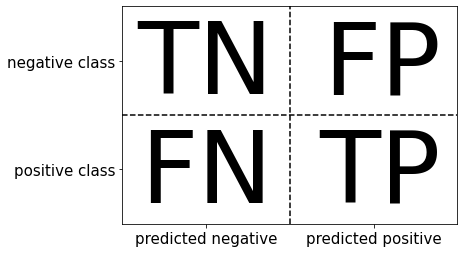

In [17]:
mglearn.plots.plot_binary_confusion_matrix()

Entries on the main diagonal correspond to correct classifications, while the other entries indicate each type of error. If we compute this for our models, we get the following.

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_most_frequent) # Dummy

array([[403,   0],
       [ 47,   0]])

In [19]:
confusion_matrix(y_test, pred_logreg) # Logistic Regression

array([[402,   1],
       [  6,  41]])

Since the dummy classifier only chooses the negative label, only true negatives and false negatives appear in the confusion matrix. Clearly there is something wrong here. Meanwhile, the logistic regression classifier's confusion matrix shows the majority of predictions are true positives and true negatives, while false positives and false negatives are minimal. Ideally, the off diagonal would contain 0's, but this illustrates why the logistic regression model's accuracy is so high and not just in a trivial manner.

Accuracy can be extracted from a confusion matrix via the following ratio:
$$
\text{Accuracy} = \frac{\text{TP+TN}}{\text{TP+FP+TN+FN}}
$$

### Precision, Recall, and F1

There are other means of combining these values to produce a summarized number that evaluates our model. Accuracy simply tells us the proportion of labels we predicted correctly, but this is not always what is most important. For example, suppose our task is predicting if a new drug will be effective in treating a disease. Clinical trials are often expensive, so the pharmaceutical company will only want to run experiments if they are fairly certain the drug will work. As such, the model should not produce many false positives. This is best measured by **precision** (also called positive predictive value).

$$
\text{Precision} = \frac{\text{TP}}{\text{TP+FP}}
$$

While precision is used when we don't want many false positives, we can use recall when we don't want many false negatives. A good example of this would be cancer diagnosis - telling a patient they don't have cancer when they actually do would be disasterous. Also called sensitivity, hit rate, and true positive rate, recall is defined as
$$
\text{Recall} = \frac{\text{TP}}{\text{TP+FN}}
$$

Naturally, precision and recall overlap since there is only one term different between the two. Much like how we can trivially achieve high accuracy, we can also trivially achieve perfect recall by predicting only the positive label (TP will be maximized and FN will be 0). However, precision will be very low as a result because there will be many false positives.

Since neither precision nor recall provide the full picture, combination of the two called f-score or f-measure, which is the harmonic mean of precision and recall:
$$
\text{F} = 2 \cdot \frac{\text{precision}\cdot\text{recall}}{\text{precision}+\text{recall}}
$$

This particular f-score is called the **f1-score**.

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Precision: {precision_score(y_test, pred_logreg)}")
print(f"Recall: {recall_score(y_test, pred_logreg)}")
print(f"F1: {f1_score(y_test, pred_logreg)}")

Precision: 0.9761904761904762
Recall: 0.8723404255319149
F1: 0.9213483146067415


The `classification_report` method produces a table with this information and more, and does so when viewing each label as the positive label.

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



More information on scores like precision, recall, and F1 can be found on [this Wikipedia page](https://en.wikipedia.org/wiki/Sensitivity_and_specificity).